In [1]:
# Importing the libs
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set() # default configs

%matplotlib inline

In [2]:
# Import the dataset
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [4]:
# Checkout dataset
test.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         1
TotRmsAbvGrd        0
Functional          2
Fireplaces          0
FireplaceQu       730
GarageType         76
GarageYrBlt        78
GarageFinish       78
GarageCars          1
GarageArea          1
GarageQual         78
GarageCond

In [5]:
def face_plt(feature, limit = False, xmin = None, xmax = None):
    facet = sns.FacetGrid(train, hue = 'SalePrice', aspect = 4)
    facet.map(sns.kdeplot, feature, shade = True)
    facet.set(xlim = (0, train[feature].max()))
    facet.add_legend()
    if limit is True:
        plt.xlim(xmin,xmax)
    plt.show()

In [6]:
dist_plt = lambda feature,dataset : sns.distplot(train[feature]) if dataset == 0 else sns.distplot(test[feature])

In [7]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
# train['MSZoning'].fillna(train.groupby('Neighborhood')['MSZoning'].mode(), inplace = True)

In [9]:
train.groupby('Neighborhood')['MSZoning'].value_counts()

Neighborhood  MSZoning
Blmngtn       RL           16
              RM            1
Blueste       RM            2
BrDale        RM           16
BrkSide       RM           30
              RL           28
ClearCr       RL           28
CollgCr       RL          140
              RM           10
Crawfor       RL           46
              RM            3
              RH            2
Edwards       RL           90
              RM            8
              RH            2
Gilbert       RL           79
IDOTRR        RM           28
              C (all)       9
MeadowV       RM           17
Mitchel       RL           44
              RM            5
NAmes         RL          223
              RH            2
NPkVill       RL            9
NWAmes        RL           73
NoRidge       RL           41
NridgHt       RL           76
              RM            1
OldTown       RM           95
              RL           17
              C (all)       1
SWISU         RL           20
              RH 

In [10]:
train.MSZoning.value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [11]:
'''
RL: 0
RM: 1
FV: 2
RH: 3
C (all): 4
'''

'\nRL: 0\nRM: 1\nFV: 2\nRH: 3\nC (all): 4\n'

In [12]:
train_test_data = [train, test]

In [13]:
mszoning_mapping = {'RL': 0, 'RM': 1, 'FV': 2, 'RH': 3, 'C (all)': 4}

for dataset in train_test_data:
    dataset['MSZoning_categories'] = dataset['MSZoning'].map(mszoning_mapping)

In [14]:
test.MSZoning_categories.isnull().sum()

4

In [15]:
# # Taking care of missing data
# from sklearn.preprocessing import Imputer
# imputer = Imputer(missing_values = 'NaN', strategy = 'most_frequent', axis = 0)
# data = test.iloc[:, [test.columns.get_loc('MSZoning_categories')]].values
# test['MSZoning_categories'] = imputer.fit_transform(data)

In [16]:
neighbors = test.loc[pd.isnull(test['MSZoning_categories']), 'Neighborhood'].tolist()
neighbors = set(neighbors)

In [17]:
neighbors = list(neighbors)
print(neighbors)

['IDOTRR', 'Mitchel']


In [18]:
from scipy import stats
modes_arr = test.groupby('Neighborhood')['MSZoning_categories'].apply(lambda x : stats.mode(x)[0][0])[neighbors]
values = list(modes_arr)

dict_ms_zoning = {}
for i in range(len(neighbors)):
    dict_ms_zoning[neighbors[i]] = values[i]

print (dict_ms_zoning)

{'IDOTRR': 1.0, 'Mitchel': 0.0}


In [19]:
# MSZoning filling NaN values 
test.loc[(pd.isnull(test['MSZoning_categories'])) & (test['Neighborhood'] == 'Mitchel'), 'MSZoning_categories'] = dict_ms_zoning['Mitchel']
test.loc[(pd.isnull(test['MSZoning_categories'])) & (test['Neighborhood'] == 'IDOTRR'), 'MSZoning_categories'] = dict_ms_zoning['IDOTRR']

In [20]:
test.MSZoning_categories.isnull().sum()

0

In [21]:
# correlation wrt one feature in acending or decending order as prefferred
corr_df = pd.DataFrame(train.corr()['SalePrice'])
corr_df.sort_values(by = 'SalePrice', ascending = False)

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


In [22]:
train['LotFrontage'].fillna(train.groupby(['Neighborhood', 'BldgType'])['LotFrontage'].transform('median'), inplace = True)
test['LotFrontage'].fillna(test.groupby(['Neighborhood', 'BldgType'])['LotFrontage'].transform('median'), inplace = True)

In [23]:
test.LotFrontage.isnull().sum()

1

In [24]:
# Still NaN means, those houses dont have the frontage
train['LotFrontage'].fillna(0, inplace = True)
test['LotFrontage'].fillna(0, inplace = True)

In [25]:
test.LotFrontage.isnull().sum()

0

In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
Id                     1460 non-null int64
MSSubClass             1460 non-null int64
MSZoning               1460 non-null object
LotFrontage            1460 non-null float64
LotArea                1460 non-null int64
Street                 1460 non-null object
Alley                  91 non-null object
LotShape               1460 non-null object
LandContour            1460 non-null object
Utilities              1460 non-null object
LotConfig              1460 non-null object
LandSlope              1460 non-null object
Neighborhood           1460 non-null object
Condition1             1460 non-null object
Condition2             1460 non-null object
BldgType               1460 non-null object
HouseStyle             1460 non-null object
OverallQual            1460 non-null int64
OverallCond            1460 non-null int64
YearBuilt              1460 non-null int64
YearRemodAdd        

In [27]:
train['Alley'].fillna('NoAlley', inplace = True)
test['Alley'].fillna('NoAlley', inplace = True)

In [28]:
'''
BrkCmn : 0
BrkFace : 1
CBlock: 2
None: 3
Stone: 4
'''

'\nBrkCmn : 0\nBrkFace : 1\nCBlock: 2\nNone: 3\nStone: 4\n'

In [29]:
masvn_mapping = {"BrkCmn" : 0, "BrkFace" : 1, "CBlock": 2, "None": 3, "Stone": 4}
for dataset in train_test_data:
    dataset['MasVnrType_values'] = dataset['MasVnrType'].map(masvn_mapping)

In [30]:
train['MasVnrType_values'].fillna(train.groupby(['Neighborhood', 'BldgType'])['MasVnrType_values'].transform('median'), inplace = True)
test['MasVnrType_values'].fillna(test.groupby(['Neighborhood', 'BldgType'])['MasVnrType_values'].transform('median'), inplace = True)

In [31]:
train['MasVnrArea'].isnull().sum()

8

In [32]:
test['MasVnrArea'].isnull().sum()

15

In [33]:
train['MasVnrArea'].fillna(train.groupby(['Neighborhood', 'BldgType'])['MasVnrArea'].transform('median'), inplace = True)
test['MasVnrArea'].fillna(test.groupby(['Neighborhood', 'BldgType'])['MasVnrArea'].transform('median'), inplace = True)

In [34]:
train['MasVnrArea'].isnull().sum()

0

In [35]:
test['MasVnrArea'].isnull().sum()

0

## Remove rows with min. NaN column values

In [36]:
train['BsmtQual'].fillna('NA', inplace = True)
test['BsmtQual'].fillna('NA', inplace = True)

train['BsmtCond'].fillna('NA', inplace = True)
test['BsmtCond'].fillna('NA', inplace = True)

train['BsmtExposure'].fillna('NA', inplace = True)
test['BsmtExposure'].fillna('NA', inplace = True)

train['BsmtFinType1'].fillna('NA', inplace = True)
test['BsmtFinType1'].fillna('NA', inplace = True)

train['BsmtFinType2'].fillna('NA', inplace = True)
test['BsmtFinType2'].fillna('NA', inplace = True)

train['FireplaceQu'].fillna('NA', inplace = True)

train['GarageType'].fillna('NA', inplace = True)

train['GarageYrBlt'].fillna(0, inplace = True)

train['GarageFinish'].fillna('NA', inplace = True)

train['GarageQual'].fillna('NA', inplace = True)

train['GarageCond'].fillna('NA', inplace = True)

train['PoolQC'].fillna('NA', inplace = True)

train['Fence'].fillna('NA', inplace = True)

train['MiscFeature'].fillna('NA', inplace = True)

In [37]:
# only 1 row is NaN hence filling it with most type of electricals in that type of house - : no explicit queries
train['Electrical'].fillna('SBrkr', inplace = True)

In [38]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 83 columns):
Id                     1460 non-null int64
MSSubClass             1460 non-null int64
MSZoning               1460 non-null object
LotFrontage            1460 non-null float64
LotArea                1460 non-null int64
Street                 1460 non-null object
Alley                  1460 non-null object
LotShape               1460 non-null object
LandContour            1460 non-null object
Utilities              1460 non-null object
LotConfig              1460 non-null object
LandSlope              1460 non-null object
Neighborhood           1460 non-null object
Condition1             1460 non-null object
Condition2             1460 non-null object
BldgType               1460 non-null object
HouseStyle             1460 non-null object
OverallQual            1460 non-null int64
OverallCond            1460 non-null int64
YearBuilt              1460 non-null int64
YearRemodAdd      

In [39]:
test['Utilities'].fillna('AllPub', inplace = True)

In [40]:
test['Exterior2nd'].value_counts()

VinylSd    510
MetalSd    233
HdBoard    199
Wd Sdng    194
Plywood    128
CmentBd     66
Wd Shng     43
BrkFace     22
Stucco      21
AsbShng     18
Brk Cmn     15
ImStucc      5
CBlock       2
Stone        1
AsphShn      1
Name: Exterior2nd, dtype: int64

In [41]:
exterior_mapping = {"AsbShng": 0, "AsphShn": 1, "BrkComm": 2, "BrkFace": 3, "CBlock": 4, "CemntBd": 5, "HdBoard": 6, "ImStucc": 7, "MetalSd": 8, "Other": 9, "Plywood": 10, "PreCast": 11, "Stone": 12, "Stucco": 13, "VinylSd": 14, "Wd Sdng": 15, "WdShing": 16}
for dataset in train_test_data:
    dataset['Exterior1st_values'] = dataset['Exterior1st'].map(exterior_mapping)

In [42]:
exterior_mapping = {"AsbShng": 0, "AsphShn": 1, "Brk Cmn": 2, "BrkFace": 3, "CBlock": 4, "CmentBd": 5, "HdBoard": 6, "ImStucc": 7, "MetalSd": 8, "Other": 9, "Plywood": 10, "PreCast": 11, "Stone": 12, "Stucco": 13, "VinylSd": 14, "Wd Sdng": 15, "Wd Shng": 16}
for dataset in train_test_data:
    dataset['Exterior2nd_values'] = dataset['Exterior2nd'].map(exterior_mapping)

In [43]:
test['Exterior1st_values'].fillna(test.groupby(['Neighborhood', 'BldgType'])['Exterior1st_values'].transform('median'), inplace = True)
test['Exterior2nd_values'].fillna(test.groupby(['Neighborhood', 'BldgType'])['Exterior2nd_values'].transform('median'), inplace = True)

In [44]:
test['Exterior2nd_values'].unique().size

16

In [45]:
test['BsmtFinSF1'].fillna(test.groupby(['Neighborhood', 'BldgType'])['BsmtFinSF1'].transform('median'), inplace = True)
test['BsmtFinSF2'].fillna(test.groupby(['Neighborhood', 'BldgType'])['BsmtFinSF2'].transform('median'), inplace = True)
test['BsmtUnfSF'].fillna(test.groupby(['Neighborhood', 'BldgType'])['BsmtUnfSF'].transform('median'), inplace = True)
test['TotalBsmtSF'].fillna(test.groupby(['Neighborhood', 'BldgType'])['TotalBsmtSF'].transform('median'), inplace = True)
test['BsmtFullBath'].fillna(test.groupby(['Neighborhood', 'BldgType'])['BsmtFullBath'].transform('median'), inplace = True)
test['BsmtHalfBath'].fillna(test.groupby(['Neighborhood', 'BldgType'])['BsmtHalfBath'].transform('median'), inplace = True)

In [46]:
kitchen_mapping = {"EX": 0, "Gd": 1, "Td": 2, "TA": 3, "Fa": 4, "Po": 5}
for dataset in train_test_data:
    dataset['KitchenQual_values'] = dataset['KitchenQual'].map(kitchen_mapping)

In [47]:
test['KitchenQual_values'].fillna(test.groupby(['Neighborhood', 'BldgType'])['KitchenQual_values'].transform('median'), inplace = True)

In [48]:
functional_mapping = { "Typ": 0, "Min1": 1, "Min2": 2, "Mod": 3, "Maj1": 4, "Maj2": 5, "Sev": 6, "Sal": 7}
for dataset in train_test_data:
    dataset['Functional_values'] = dataset['Functional'].map(functional_mapping)

In [49]:
test['Functional_values'].fillna(test.groupby(['Neighborhood', 'BldgType'])['Functional_values'].transform('median'), inplace = True)

In [50]:
test['FireplaceQu'].fillna('NA', inplace = True)
test['GarageType'].fillna('NA', inplace = True)
test['GarageYrBlt'].fillna(0, inplace = True)
test['GarageArea'].fillna(0, inplace = True)
test['GarageCars'].fillna(0, inplace = True)
test['GarageFinish'].fillna('NA', inplace = True)
test['GarageCond'].fillna('NA', inplace = True)
test['GarageQual'].fillna('NA', inplace = True)
test['PoolQC'].fillna('NA', inplace = True)
test['MiscFeature'].fillna('NA', inplace = True)
test['Fence'].fillna('NA', inplace = True)

In [51]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 86 columns):
Id                     1459 non-null int64
MSSubClass             1459 non-null int64
MSZoning               1455 non-null object
LotFrontage            1459 non-null float64
LotArea                1459 non-null int64
Street                 1459 non-null object
Alley                  1459 non-null object
LotShape               1459 non-null object
LandContour            1459 non-null object
Utilities              1459 non-null object
LotConfig              1459 non-null object
LandSlope              1459 non-null object
Neighborhood           1459 non-null object
Condition1             1459 non-null object
Condition2             1459 non-null object
BldgType               1459 non-null object
HouseStyle             1459 non-null object
OverallQual            1459 non-null int64
OverallCond            1459 non-null int64
YearBuilt              1459 non-null int64
YearRemodAdd      

In [52]:
# Only one value missing, so did the manual analysis - below
test['SaleType'].fillna('WD', inplace = True)

In [53]:
test.groupby(['Neighborhood', 'BldgType'])['SaleType'].value_counts()

Neighborhood  BldgType  SaleType
Blmngtn       1Fam      New          2
              TwnhsE    WD           7
                        New          2
Blueste       Twnhs     WD           4
              TwnhsE    WD           4
BrDale        Twnhs     WD          11
                        COD          1
              TwnhsE    WD           2
BrkSide       1Fam      WD          45
                        COD          1
                        CWD          1
                        ConLD        1
                        ConLI        1
                        ConLw        1
ClearCr       1Fam      WD          13
                        COD          2
              Twnhs     WD           1
CollgCr       1Fam      WD          98
                        New         14
                        Con          1
              Duplex    WD           1
              TwnhsE    WD           3
Crawfor       1Fam      WD          40
                        CWD          2
              2fmCon    WD     

In [54]:
test[pd.isnull(test['SaleType'])][['Neighborhood', 'BldgType']]

,Neighborhood,BldgType


In [55]:
'''
MSZoning_categories    1459 non-null float64
MasVnrType_values      1459 non-null float64
Exterior1st_values     1459 non-null float64
Exterior2nd_values     1459 non-null float64
KitchenQual_values     1459 non-null float64
Functional_values 
'''

'\nMSZoning_categories    1459 non-null float64\nMasVnrType_values      1459 non-null float64\nExterior1st_values     1459 non-null float64\nExterior2nd_values     1459 non-null float64\nKitchenQual_values     1459 non-null float64\nFunctional_values \n'

In [56]:
test.drop(['MSZoning', 'MasVnrType', 'Exterior1st', 'Exterior2nd', 'KitchenQual', 'Functional'], axis = 1, inplace = True)
train.drop(['MSZoning', 'MasVnrType', 'Exterior1st', 'Exterior2nd', 'KitchenQual', 'Functional'], axis = 1, inplace = True)

# Model Building

In [58]:
train.info()
train = train.drop('Id', axis = 1).copy()
df_ids = test['Id']
test = test.drop('Id', axis = 1).copy()

# Model stuff below

In [59]:
X = train.drop('SalePrice', axis = 1).copy()
y = train['SalePrice']

In [60]:
features_to_be_endcoded = [key for key in dict(train.dtypes) if dict(train.dtypes)[key] in ['object']] 
features_to_be_endcoded.extend(['MSZoning_categories', 'MasVnrType_values', 'Exterior1st_values', 'Exterior2nd_values', 'KitchenQual_values', 'Functional_values'])
train_objs_num = len(X)
dataset = pd.concat(objs=[X, test], axis=0)
dataset = pd.get_dummies(dataset, columns = features_to_be_endcoded, prefix = features_to_be_endcoded, drop_first= True)
train = pd.DataFrame.copy(dataset[:train_objs_num])
test = pd.DataFrame.copy(dataset[train_objs_num:])

In [61]:
print(train.shape)
print(test.shape)

(1460, 260)
(1459, 260)


In [62]:
new_df = pd.concat(objs = [train, y], axis = 1)

In [63]:
corr_df = pd.DataFrame(new_df.corr()['SalePrice'])
corr_df.sort_values(by = 'SalePrice', ascending= False)

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


In [64]:
threshold = 0.30
df  = corr_df['SalePrice'].gt(threshold, 0)

In [65]:
columns = []
dict(df)
for k,v in df.items():
    if v:
        columns.append(k)

columns.remove('SalePrice')

In [66]:
train = train[columns]
test = test[columns]

In [67]:
# Splitting the dataset into the Training set and Test set
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(train, y, test_size = 0.2, random_state = 0)

### Adj R - square

In [68]:
from statsmodels.tools.tools import add_constant
import statsmodels.formula.api as sm
# added x0 values with 1's
train = add_constant(data = train)

In [69]:
# First model
train_opt = train.iloc[:,:]
regressor_OLS = sm.OLS(endog = y, exog = train_opt).fit()
print("Initial No of columns-",regressor_OLS.pvalues.size)
print(regressor_OLS.summary())


#Dropping Columns based on p-values
Best_adj_rsquare = 1
p_value = 1

print("*"*15)
print(regressor_OLS.pvalues)


def check_rsquare(ols,rsquare):
    if(ols.rsquared_adj < rsquare):
        return -1
    return 1

while (p_value > 0.05):
    
    Best_adj_rsquare = regressor_OLS.rsquared_adj
    p_value = max(regressor_OLS.pvalues)
    
    a = regressor_OLS.pvalues.to_dict()
    
    def getkey(list,search_p_value):
           return [column for column,p_value in list.items() if p_value == search_p_value]
    
    drop_column = getkey(a,p_value) 
    
    #Check R-square
    train_new =  train_opt.drop(drop_column, axis = 1)
    new_OLS = sm.OLS(endog = y, exog = train_new).fit()
    
    result = check_rsquare(new_OLS,Best_adj_rsquare)
    
    if (result == -1):
        train_final = train_opt 
        break
    elif (result == 1):
        regressor_OLS = new_OLS
        train_opt = train_new
        

print("*"*15)
final_OLS = sm.OLS(endog = y, exog = train_final).fit()
print(final_OLS.summary())
print("*"*15)
print("Final No of columns-",final_OLS.pvalues.size)
    

Initial No of columns- 31
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     216.0
Date:                Wed, 07 Mar 2018   Prob (F-statistic):               0.00
Time:                        16:35:32   Log-Likelihood:                -17295.
No. Observations:                1460   AIC:                         3.465e+04
Df Residuals:                    1429   BIC:                         3.482e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------


In [83]:
columns = train_final.columns.tolist()
columns.remove('const')
train = train[columns]
test = test[columns]

In [84]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
train_poly = poly_reg.fit_transform(train)
test_poly = poly_reg.transform(test)

In [85]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(train_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [86]:
y_kaggle = regressor.predict(test_poly)

In [87]:
submission = pd.DataFrame({
        "Id": df_ids,
        "SalePrice": y_kaggle
    })

submission.to_csv('submission.csv', index=False)

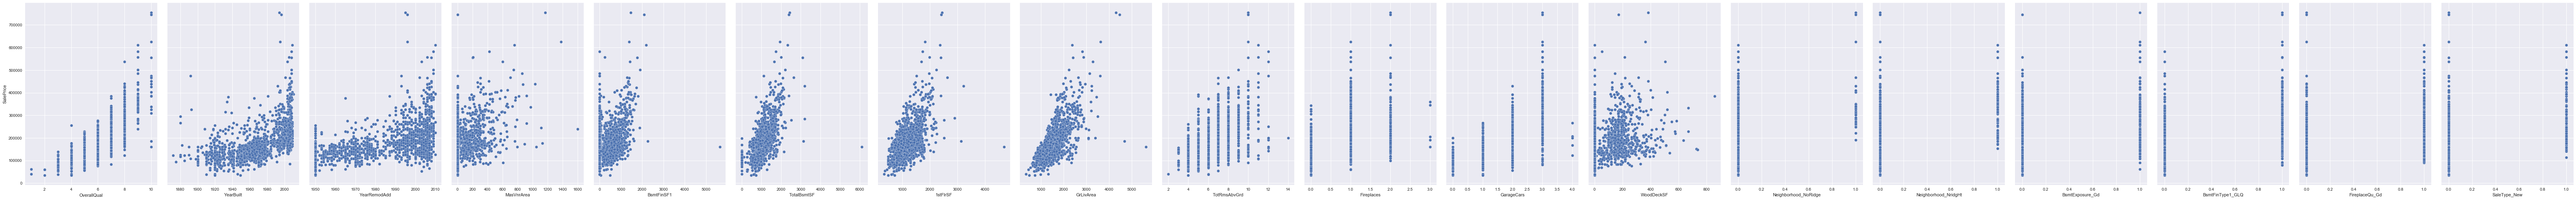

In [88]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(pd.concat(objs=[train, y], axis = 1), x_vars=columns, y_vars='SalePrice', size=7, aspect=0.7)